In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX - DATA COMPOSITION 2 (80-10-10).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,Vietnam airport,Vietnam flights,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,11,59,32,8,58,7,69,52,73,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,0,51,0,0,46,6,61,35,53,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,0,57,7,24,58,6,61,51,57,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,0,51,6,9,58,6,66,43,53,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,0,57,0,7,57,6,63,46,58,...,27,44,24,16,22,5,47,0,9,Train


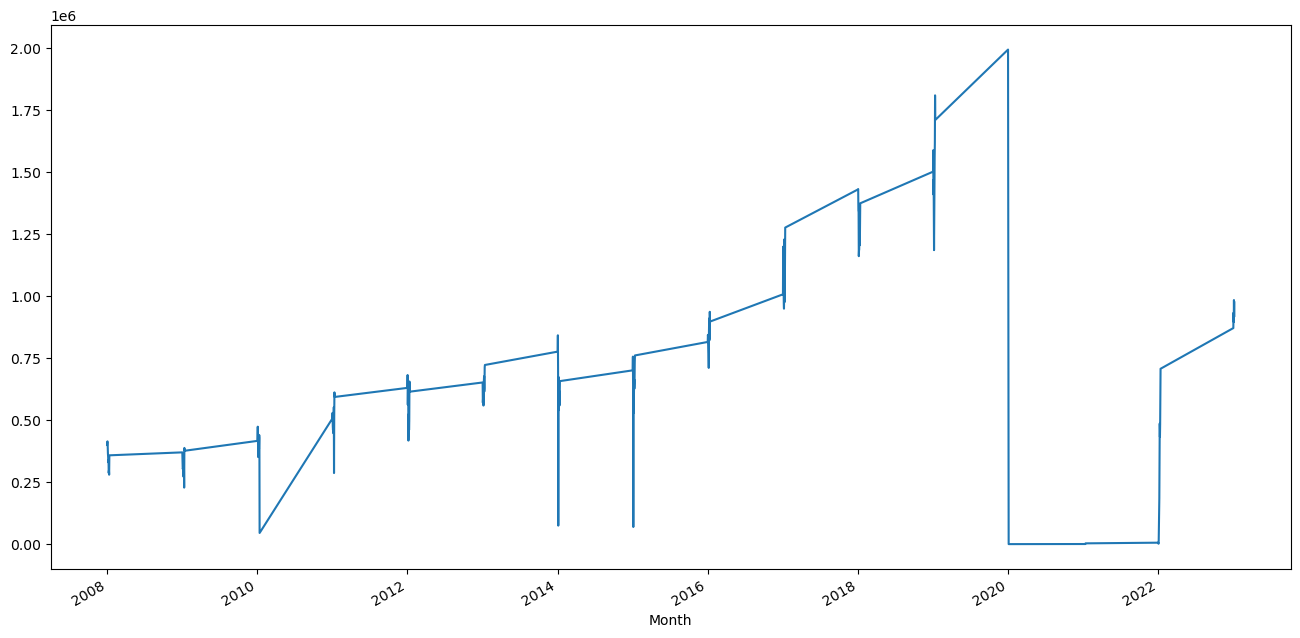

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Airbnb Vietnam  Vietnam restaurant  \
Month                                                             
2008-01-01           399556              11                  59   
2008-01-02           411032               0                  51   
2008-01-03           414332               0                  57   
2008-01-04           395900               0                  51   
2008-01-05           366387               0                  57   
...                     ...             ...                 ...   
2023-01-02           932969              64                  88   
2023-01-03           895425              65                  84   
2023-01-04           984146              58                  90   
2023-01-05           916257              56                  82   
2023-01-06           975010              63                  86   

            Shopping in Hanoi  Shopping in Ho Chi Minh  Vietnam tour  \
Month                                                   

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.16 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.24 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.06 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.19 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.19 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.07 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/04/2020'].dropna()
test = df1['Tourist Arrival']['01/05/2020':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/04/2020'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/05/2020':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20071D+01    |proj g|=  8.86704D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      0      1      0     0     0   8.867D-06   1.201D+01
  F =   12.007115883963843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  148
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1777.053
Date:                            Wed, 23 Aug 2023   AIC                           3596.106
Time:                                    22:02:46   BIC                           3657.117
Sample:                                         0   HQIC                          3620.899
                                            - 148                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Airbnb Vietnam           -264.2602   2439.276     -0.108      0.914   -5045.153    4516.633
Vietnam restaurant       3001.0648   3071.442      0.977      0.329   -3018.852    9020.981
Shopping in Hanoi         578.0744   2859.308      0.202      0.840   -5026.066    6182.214
Shopping in Ho Chi Minh   854.5271   3196.161      0.267      0.789   -5409.834    7118.888
Vietnam tour             2305.5515   3747.702      0.615      0.538   -5039.809    9650.912
Skyscanner               6213.1216   4371.998      1.421      0.155   -2355.836    1.48e+04
Vietnam visa             4654.4341   3510.701      1.326      0.185   -2226.414    1.15e+04
Vietnam airport          -128.0129   3948.873     -0.032      0.974   -7867.661    7611.635
Vietnam flights         -3244.7308   3810.107     -0.852      0.394   -1.07e+04    4222.941
Danang airport            309.8463   1778.312      0.174      0.862   -3175.582    3795.274
Hoi An                  -3251.9304   1883.353     -1.727      0.084   -6943.234     439.373
Vietnam weather           172.3604   2398.335      0.072      0.943   -4528.290    4873.011
Visa for Vietnam         2683.8741   4204.934      0.638      0.523   -5557.644    1.09e+04
Sgn airport              1163.4566   2136.193      0.545      0.586   -3023.405    5350.318
Phu Quoc                 4285.4318   1897.123      2.259      0.024     567.140    8003.724
Vietnam itinerary       -2908.4172   2580.402     -1.127      0.260   -7965.912    2149.078
Vietnam trip             4318.8579   2052.754      2.104      0.035     295.533    8342.182
Things to do in Hue      4423.7930   3339.984      1.324      0.185   -2122.456     1.1e+04
Vietnam backpackers     -6162.5239   2993.504     -2.059      0.040    -1.2e+04    -295.363
ar.S.L12                    0.3791      0.076      4.973      0.000       0.230       0.529
sigma2                   1.589e+10      0.004      4e+12      0.000    1.59e+10    1.59e+10
===================================================================================
Ljung-Box (L1) (Q):                  15.36   Jarque-Bera (JB):               130.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.27
Prob(H) (two-sided):                  0.71   Kurtosis:                         7.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.61e+28. Standard errors may be unstable.
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 216737.37588231484


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 164897.0067002668


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.9501729166791708e+20


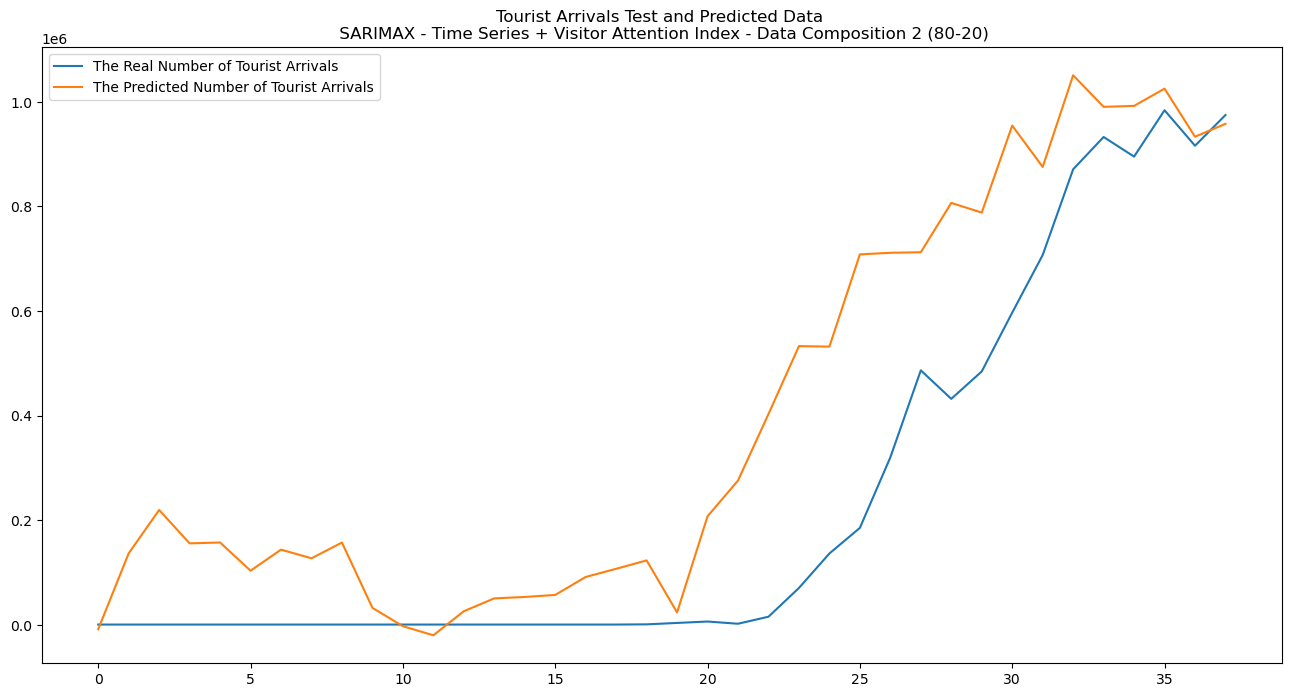

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index - Data Composition 2 (80-20)")
plt.legend()
plt.show()